In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, norm

In [2]:
mu_0 = 200
zeta_0 = 1
alpha_0 = 1
beta_0 = 2

In [3]:
def gen_lambda_dist(alpha, beta):
    return gamma(alpha, scale=1/beta)

def gen_mu_dist(mu_mean, zeta, lmd):
    return norm(loc=mu_mean, scale=np.sqrt(1/(zeta*lmd)))

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

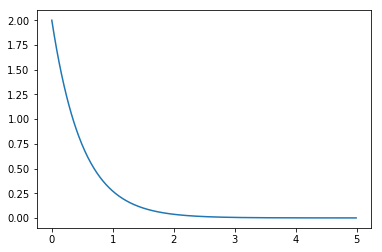

In [4]:
lambda_dist = gen_lambda_dist(alpha_0, beta_0)
draw(lambda_dist, 0, 5, 0.01)

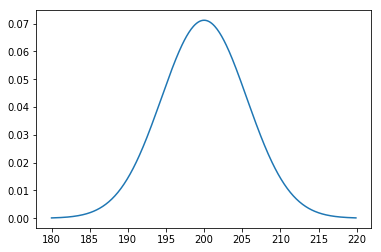

In [5]:
lmd = lambda_dist.rvs()
mu_dist = gen_mu_dist(mu_0, zeta_0, lmd)
draw(mu_dist, 180, 220, 0.1)

In [6]:
import pandas as pd  
data  = pd.read_csv("sensor_data_200.txt", delimiter=" ", 
                    header=None, names = ("date","time","ir","lidar"))
lidar = data["lidar"]

In [7]:
samples = lidar   #.sample(10000) #値を全部使う ###gaussgamma2samples
print(samples.values)
print("平均: ", samples.mean())
print("標準偏差: ", samples.std())

[214 211 199 ... 204 207 208]
平均:  209.73713297619855
標準偏差:  4.838192492920729


In [8]:
N = len(samples)
mu_N = 1.0/(N+beta_0)*sum(samples) + beta_0/(N+beta_0)*mu_0
zeta_N = N + zeta_0
alpha_N = N/2 + alpha_0
beta_N = 0.5*(sum([z**2 for z in samples]) + zeta_0*(mu_0**2) - zeta_N*(mu_N**2)) + beta_0
print(mu_N, zeta_N, alpha_N, beta_N)

209.73680284794034 58989 29495.0 692478.563742876


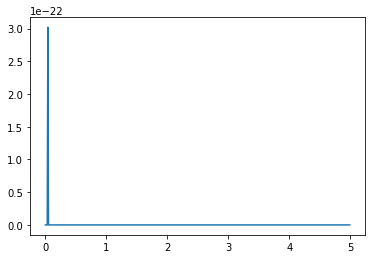

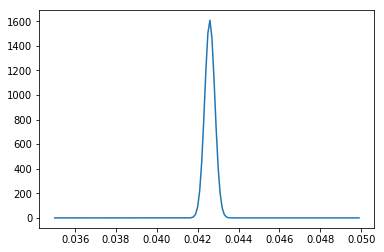

In [9]:
lambda_dist = gen_lambda_dist(alpha_N, beta_N)  ###gaussgamma2postlambda
draw(lambda_dist, 0, 5, 0.01)
draw(lambda_dist, 0.035, 0.05, 0.0001) #範囲・縮尺を変えたもの

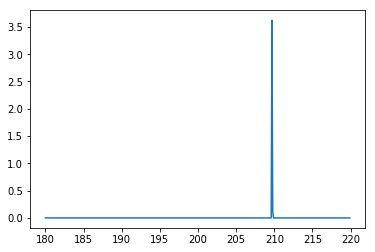

平均:  209.73680284794034
標準偏差:  4.8314778435982255


In [10]:
lmd = lambda_dist.rvs()   ###gaussgamma2postmu
mu_dist = gen_mu_dist(mu_N, zeta_N, lmd)
draw(mu_dist, 180, 220, 0.1)

print("平均: ", mu_dist.mean())
print("標準偏差: ", np.sqrt(1/lmd))

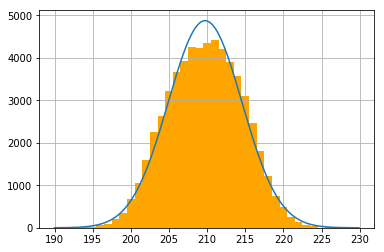

In [11]:
import matplotlib.pyplot as plt ###gaussgamma2compare

z_dist = norm(loc=mu_dist.mean(), scale=np.sqrt(1/lmd))
lidar.hist(bins = max(lidar) - min(lidar),align='left', color='orange')

xs = np.arange(190, 230, 0.1)
ys = [z_dist.pdf(x)*len(lidar) for x in xs]
plt.plot(xs, ys)
plt.show()